# Hierarchical linear models examples



## Dragons dataset

Taken from [link](https://ourcodingclub.github.io/2017/03/15/mixed-models.html#one)


In [376]:
library(ggplot2)  # load the package
library(lme4)
library(ggeffects)
library(stargazer)
library(lattice)
load("dragons.rdata")
head(dragons)
library(nlme)

dragons$bodyLength2 <- scale(dragons$bodyLength, center = TRUE, scale = TRUE)


testScore,bodyLength,mountainRange,X,site
<dbl>,<dbl>,<fct>,<lgl>,<fct>
16.147309,165.5485,Bavarian,NA,a
33.886183,167.5593,Bavarian,NA,a
6.038333,165.8830,Bavarian,NA,a
18.838821,167.6855,Bavarian,NA,a
33.862328,169.9597,Bavarian,NA,a
47.043246,168.6887,Bavarian,NA,a


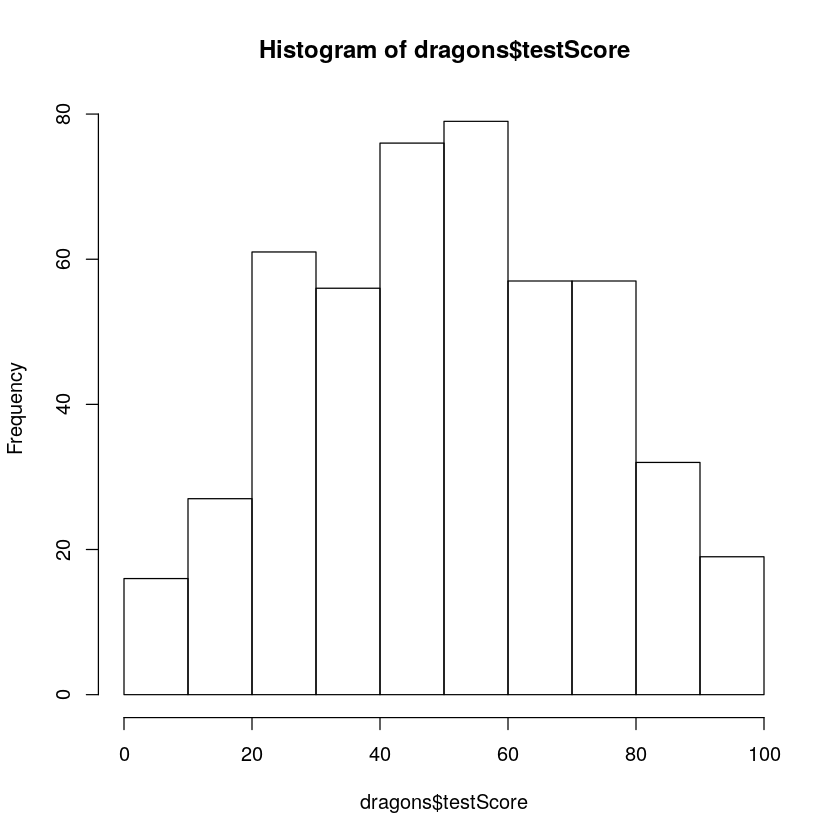

In [377]:
hist(dragons$testScore)

In [378]:
dragons$bodyLength2 <- scale(dragons$bodyLength, center = TRUE, scale = TRUE)
basic.lm <- lm(testScore ~ bodyLength2, data = dragons)
summary(basic.lm)



Call:
lm(formula = testScore ~ bodyLength2, data = dragons)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.962 -16.411  -0.783  15.193  55.200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  50.3860     0.9676  52.072   <2e-16 ***
bodyLength2   8.9956     0.9686   9.287   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.2 on 478 degrees of freedom
Multiple R-squared:  0.1529,	Adjusted R-squared:  0.1511 
F-statistic: 86.25 on 1 and 478 DF,  p-value: < 2.2e-16


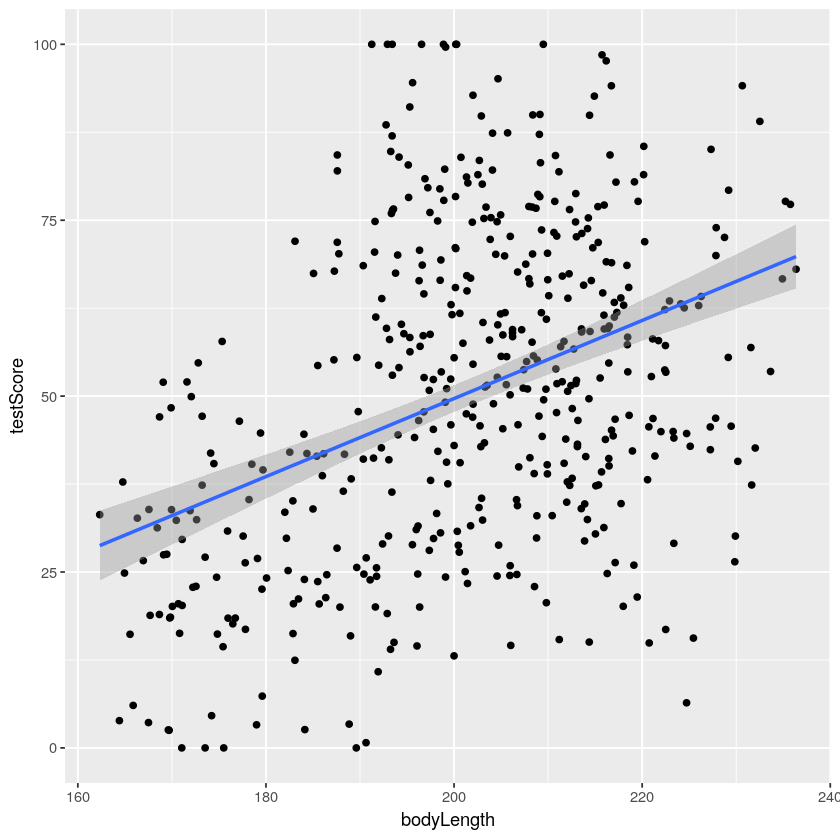

In [379]:


(prelim_plot <- ggplot(dragons, aes(x = bodyLength, y = testScore)) +
  geom_point() +
  geom_smooth(method = "lm"))

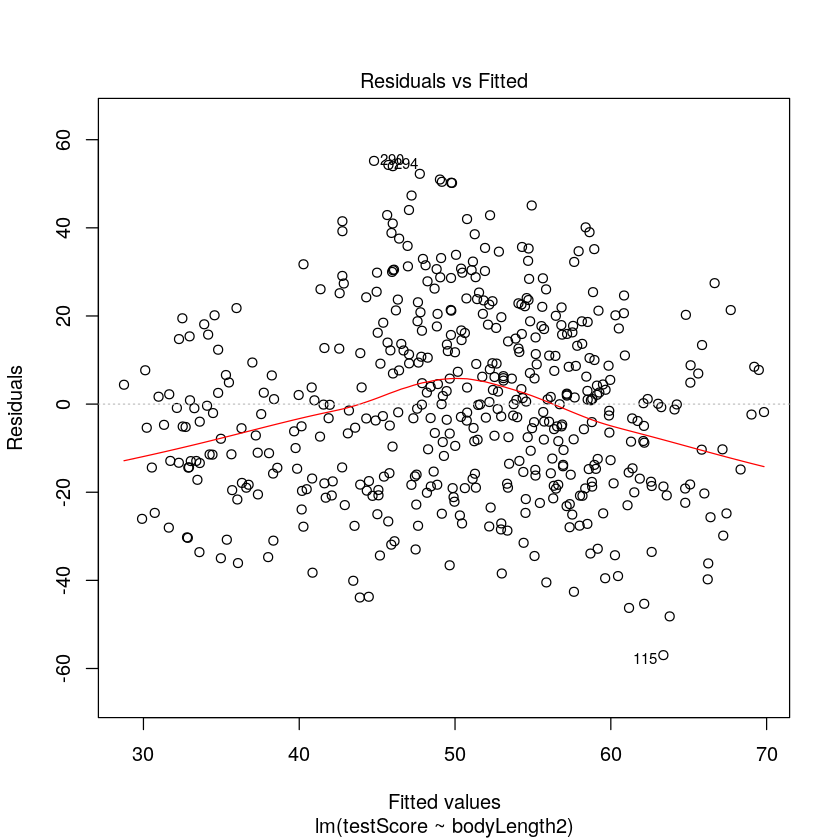

In [380]:
plot(basic.lm, which = 1)  # not perfect... 


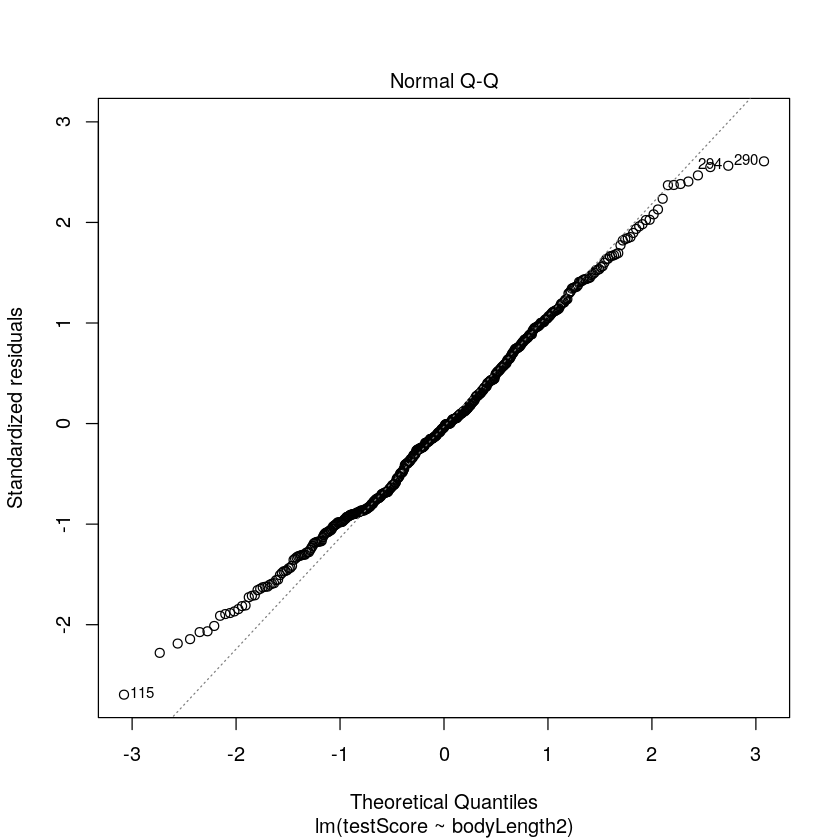

In [381]:
plot(basic.lm, which = 2)  # a bit off at the extremes, but that's often the case; again doesn't look too bad


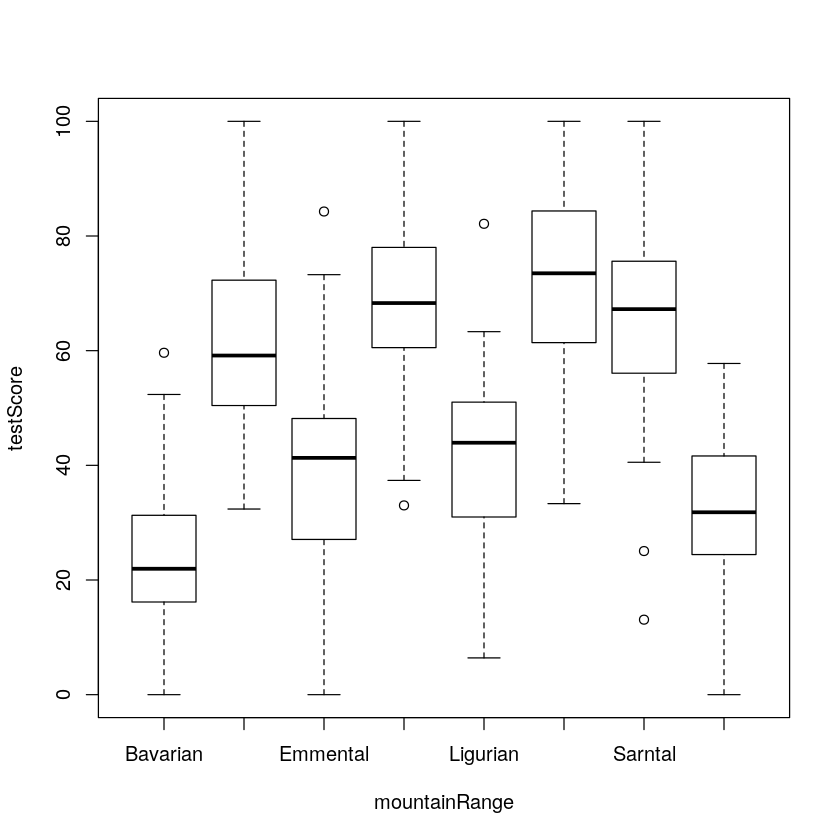

In [382]:
boxplot(testScore ~ mountainRange, data = dragons)  # certainly looks like something is going on here


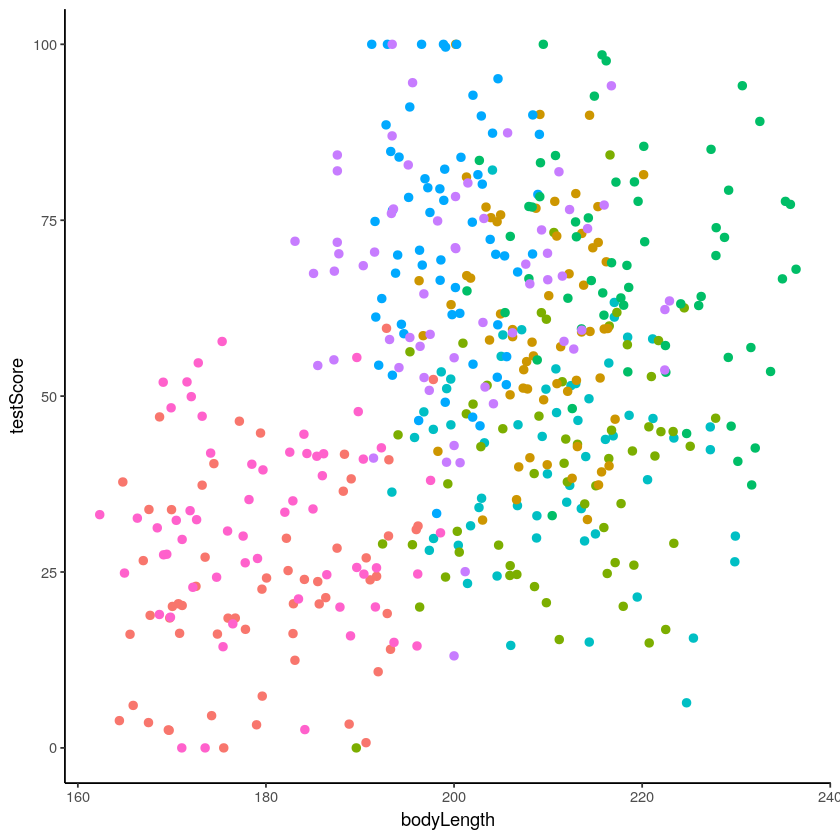

In [383]:
(colour_plot <- ggplot(dragons, aes(x = bodyLength, y = testScore, colour = mountainRange)) +
  geom_point(size = 2) +
  theme_classic() +
  theme(legend.position = "none"))

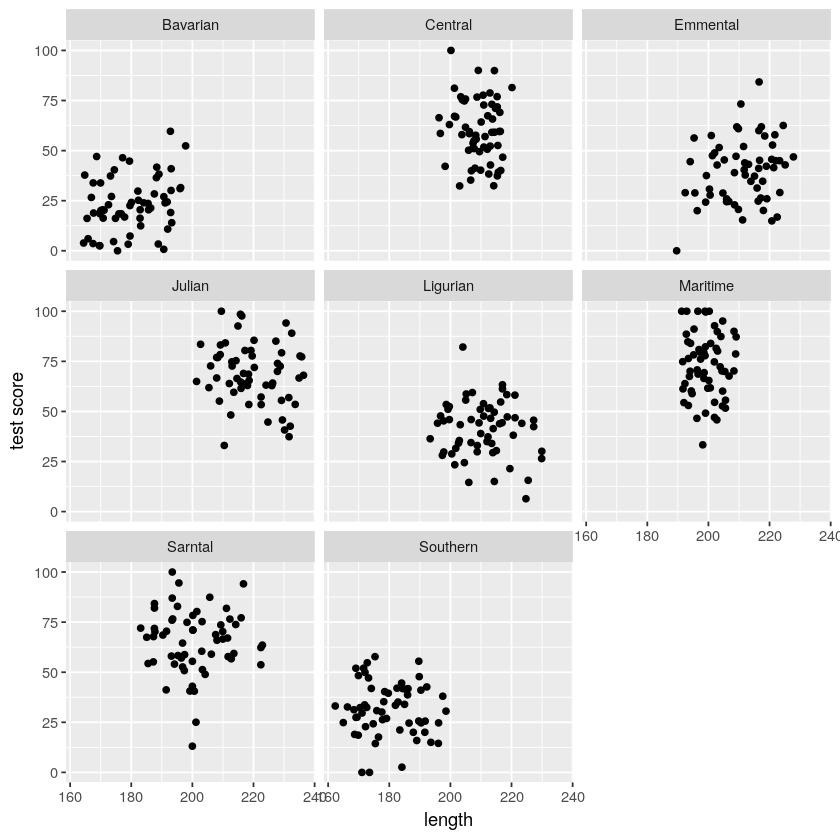

In [384]:
(split_plot <- ggplot(aes(bodyLength, testScore), data = dragons) + 
  geom_point() + 
  facet_wrap(~ mountainRange) + # create a facet for each mountain range
  xlab("length") + 
  ylab("test score"))

In [385]:
mountain.lm <- lm(testScore ~ bodyLength2 + mountainRange, data = dragons)
summary(mountain.lm)


Call:
lm(formula = testScore ~ bodyLength2 + mountainRange, data = dragons)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.263  -9.926   0.361   9.994  44.488 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            23.3818     2.5792   9.065  < 2e-16 ***
bodyLength2             0.2055     1.2927   0.159  0.87379    
mountainRangeCentral   36.5828     3.5993  10.164  < 2e-16 ***
mountainRangeEmmental  16.2092     3.6966   4.385 1.43e-05 ***
mountainRangeJulian    45.1147     4.1901  10.767  < 2e-16 ***
mountainRangeLigurian  17.7478     3.6736   4.831 1.84e-06 ***
mountainRangeMaritime  49.8813     3.1392  15.890  < 2e-16 ***
mountainRangeSarntal   41.9784     3.1972  13.130  < 2e-16 ***
mountainRangeSouthern   8.5196     2.7313   3.119  0.00192 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.96 on 471 degrees of freedom
Multiple R-squared:  0.5843,	Adjusted R-squared:  0.5773 
F

In [386]:
mixed.lmer <- lmer(testScore ~ bodyLength2 + (1|mountainRange), data = dragons)
summary(mixed.lmer)

Linear mixed model fit by REML ['lmerMod']
Formula: testScore ~ bodyLength2 + (1 | mountainRange)
   Data: dragons

REML criterion at convergence: 3985.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4815 -0.6513  0.0066  0.6685  2.9583 

Random effects:
 Groups        Name        Variance Std.Dev.
 mountainRange (Intercept) 339.7    18.43   
 Residual                  223.8    14.96   
Number of obs: 480, groups:  mountainRange, 8

Fixed effects:
            Estimate Std. Error t value
(Intercept)  50.3860     6.5517   7.690
bodyLength2   0.5377     1.2750   0.422

Correlation of Fixed Effects:
            (Intr)
bodyLength2 0.000 

In [387]:
coef(mountain.lm)
coef(mixed.lmer)
# plot(mixed.lmer)

(Intercept)           bodyLength2  mountainRangeCentral 
           23.3818026             0.2054583            36.5827722 
mountainRangeEmmental   mountainRangeJulian mountainRangeLigurian 
           16.2092289            45.1146862            17.7477880 
mountainRangeMaritime  mountainRangeSarntal mountainRangeSouthern 
           49.8813324            41.9784147             8.5196134

$mountainRange
         (Intercept) bodyLength2
Bavarian    24.10970   0.5376776
Central     59.69920   0.5376776
Emmental    39.50962   0.5376776
Julian      67.92656   0.5376776
Ligurian    41.04019   0.5376776
Maritime    73.05579   0.5376776
Sarntal     65.20965   0.5376776
Southern    32.53753   0.5376776

attr(,"class")
[1] "coef.mer"

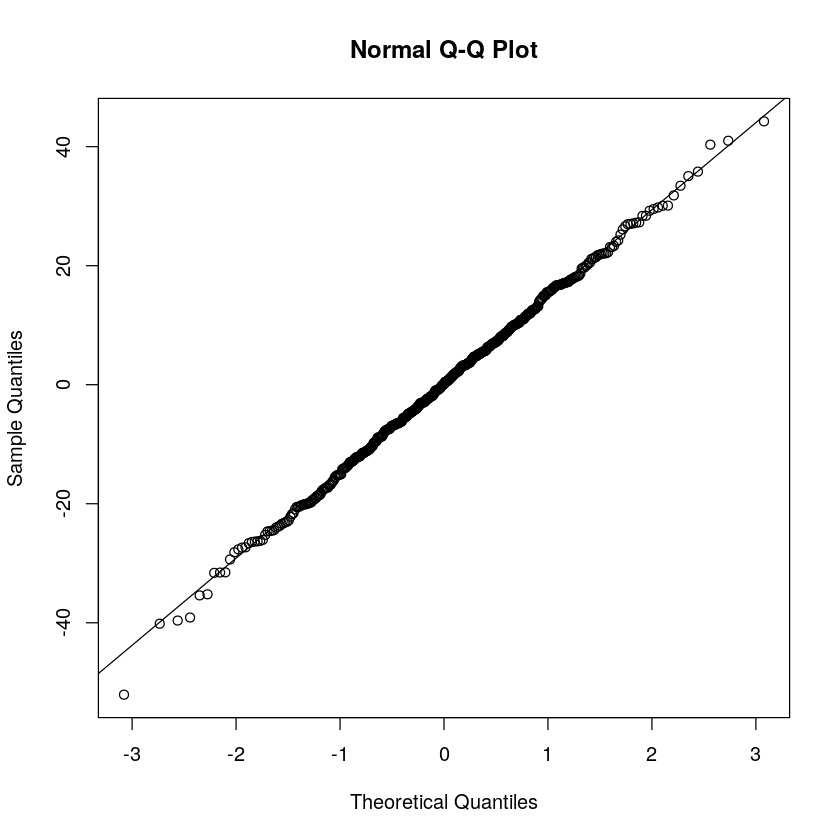

In [388]:
qqnorm(resid(mixed.lmer))
qqline(resid(mixed.lmer))  # points fall nicely onto the line - good!

In [389]:
dragons <- within(dragons, sample <- factor(mountainRange:site))


In [446]:
mixed.lmer2 <- lmer(testScore ~ bodyLength2 + (1|mountainRange)+(1|sample), data = dragons)  # the syntax stays the same, but now the nesting is taken into account
summary(mixed.lmer2)

Linear mixed model fit by REML ['lmerMod']
Formula: testScore ~ bodyLength2 + (1 | mountainRange) + (1 | sample)
   Data: dragons

REML criterion at convergence: 3970.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2425 -0.6752 -0.0117  0.6974  2.8812 

Random effects:
 Groups        Name        Variance Std.Dev.
 sample        (Intercept)  23.09    4.805  
 mountainRange (Intercept) 327.56   18.099  
 Residual                  208.58   14.442  
Number of obs: 480, groups:  sample, 24; mountainRange, 8

Fixed effects:
            Estimate Std. Error t value
(Intercept)   50.386      6.507   7.743
bodyLength2    0.831      1.681   0.494

Correlation of Fixed Effects:
            (Intr)
bodyLength2 0.000 

$sample
           (Intercept) bodyLength2
Bavarian:a    47.91876   0.8310278
Bavarian:b    47.33325   0.8310278
Bavarian:c    54.12166   0.8310278
Central:a     43.99963   0.8310278
Central:b     51.23144   0.8310278
Central:c     56.55904   0.8310278
Emmental:a    47.35944   0.8310278
Emmental:b    52.68372   0.8310278
Emmental:c    50.35329   0.8310278
Julian:a      52.80610   0.8310278
Julian:b      52.59257   0.8310278
Julian:c      46.94555   0.8310278
Ligurian:a    51.38480   0.8310278
Ligurian:b    49.53979   0.8310278
Ligurian:c    49.57787   0.8310278
Maritime:a    46.70989   0.8310278
Maritime:b    49.75569   0.8310278
Maritime:c    56.25734   0.8310278
Sarntal:a     54.04007   0.8310278
Sarntal:b     45.47538   0.8310278
Sarntal:c     52.66497   0.8310278
Southern:a    49.70531   0.8310278
Southern:b    52.57173   0.8310278
Southern:c    47.67749   0.8310278

$mountainRange
         (Intercept) bodyLength2
Bavarian    25.07253   0.8310278
Central     59.35164   0.8310278
Em

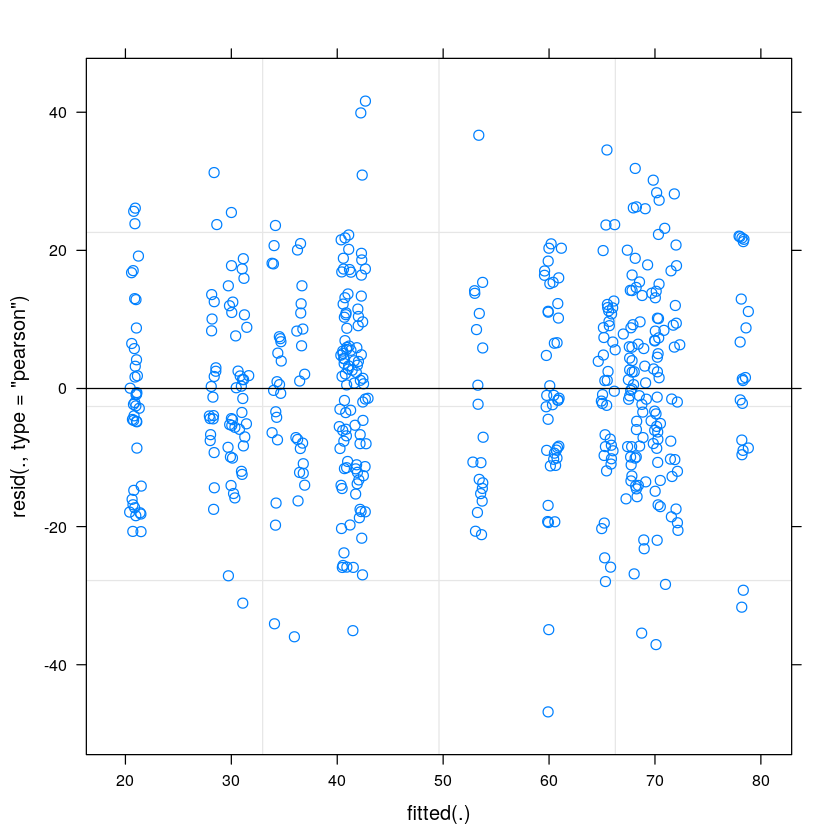

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): invalid graphics state


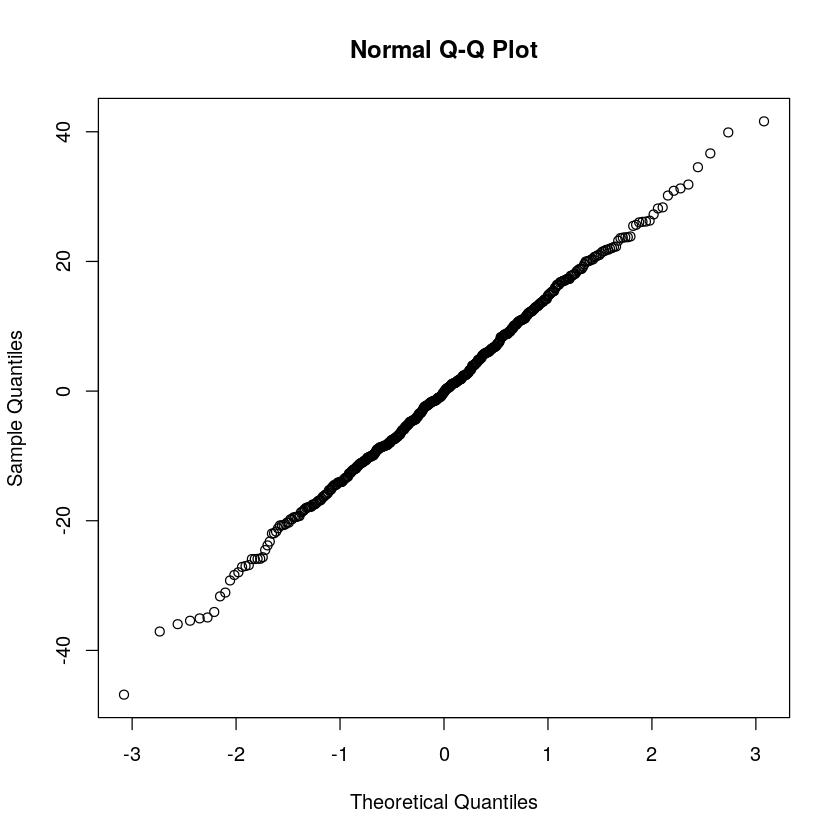

ERROR: Error in value[[3L]](cond): invalid graphics state


plot without title

In [438]:
coef(mixed.lmer2)
plot(mixed.lmer2)
qqnorm(resid(mixed.lmer2))
qqline(resid(mixed.lmer2))

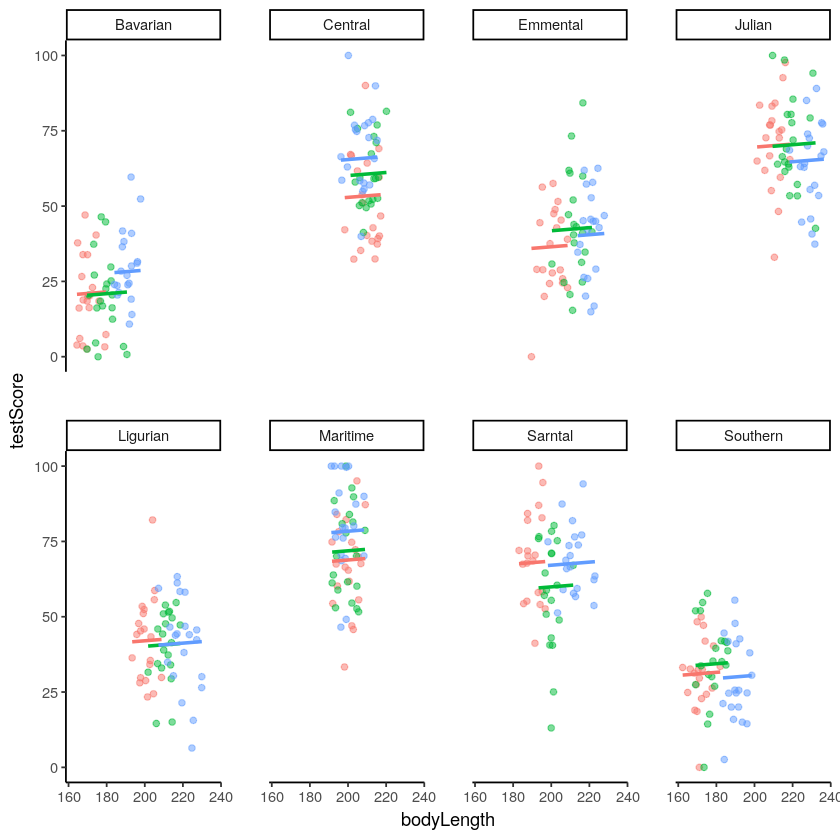

In [437]:
(mm_plot <- ggplot(dragons, aes(x = bodyLength, y = testScore, colour = site)) +
      facet_wrap(~mountainRange, nrow=2) +   # a panel for each mountain range
      geom_point(alpha = 0.5) +
      theme_classic() +
      geom_line(data = cbind(dragons, pred = predict(mixed.lmer2)), aes(y = pred), size = 1) +  # adding predicted line from mixed model 
      theme(legend.position = "none",
            panel.spacing = unit(2, "lines"))  # adding space between panels
)

In [439]:
mixed.slope <- lmer(testScore ~ bodyLength2 + (1 + bodyLength2|mountainRange/site), data = dragons) 

summary(mixed.slope)

boundary (singular) fit: see ?isSingular


Linear mixed model fit by REML ['lmerMod']
Formula: testScore ~ bodyLength2 + (1 + bodyLength2 | mountainRange/site)
   Data: dragons

REML criterion at convergence: 3968.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2653 -0.6737 -0.0200  0.6931  2.8432 

Random effects:
 Groups             Name        Variance Std.Dev. Corr 
 site:mountainRange (Intercept)  19.8243  4.4524       
                    bodyLength2   0.7195  0.8482  1.00 
 mountainRange      (Intercept) 310.9736 17.6344       
                    bodyLength2   6.1176  2.4734  -1.00
 Residual                       208.5003 14.4395       
Number of obs: 480, groups:  site:mountainRange, 24; mountainRange, 8

Fixed effects:
            Estimate Std. Error t value
(Intercept)  51.4267     6.3409   8.110
bodyLength2   0.6692     1.8732   0.357

Correlation of Fixed Effects:
            (Intr)
bodyLength2 -0.461
convergence code: 0
boundary (singular) fit: see ?isSingular


$`site:mountainRange`
           (Intercept) bodyLength2
a:Bavarian    50.51919  0.49634303
a:Central     45.42964 -0.47327568
a:Emmental    49.75686  0.35110947
a:Julian      52.70312  0.91240650
a:Ligurian    52.30407  0.83638323
a:Maritime    48.09984  0.03542909
a:Sarntal     54.13907  1.18597031
a:Southern    51.39802  0.66376945
b:Bavarian    48.75427  0.16010488
b:Central     52.26642  0.82920988
b:Emmental    53.84849  1.13061221
b:Julian      53.29595  1.02534614
b:Ligurian    50.12596  0.42142753
b:Maritime    50.91054  0.57089908
b:Sarntal     46.59597 -0.25107617
b:Southern    53.65673  1.09407978
c:Bavarian    54.22491  1.20232377
c:Central     56.99346  1.72976578
c:Emmental    51.18995  0.62413076
c:Julian      49.60941  0.32301985
c:Ligurian    49.45391  0.29339368
c:Maritime    56.90258  1.71245073
c:Sarntal     54.29805  1.21625857
c:Southern    47.76537 -0.02829169

$mountainRange
         (Intercept) bodyLength2
Bavarian    28.48538   3.8869470
Central     60.16000 

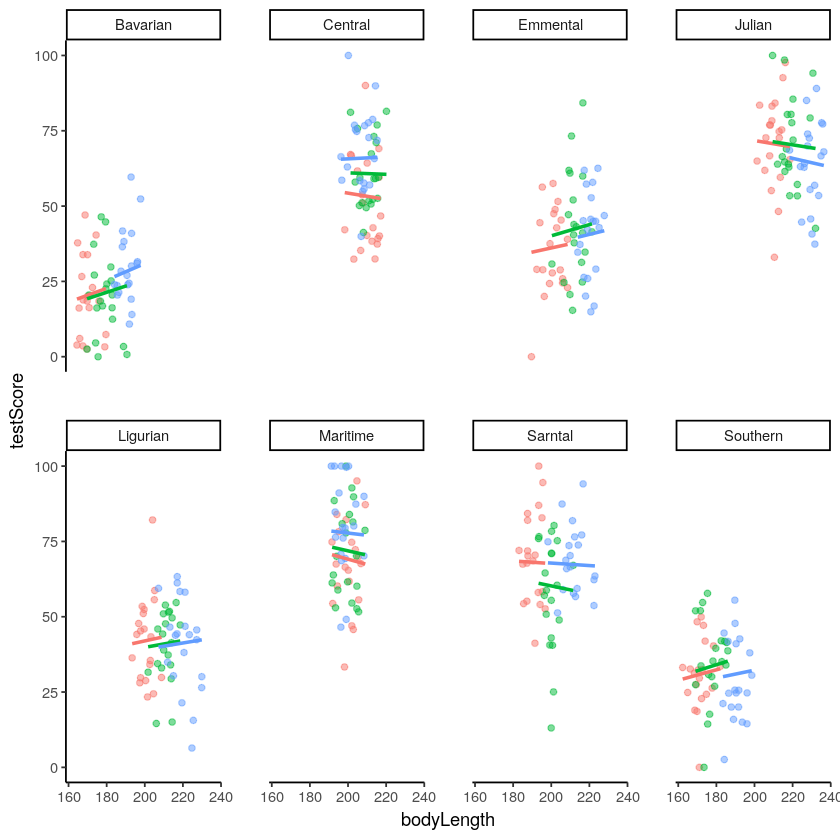

In [440]:
coef(mixed.slope )

(mm_plot <- ggplot(dragons, aes(x = bodyLength, y = testScore, colour = site)) +
      facet_wrap(~mountainRange, nrow=2) +   # a panel for each mountain range
      geom_point(alpha = 0.5) +
      theme_classic() +
      geom_line(data = cbind(dragons, pred = predict(mixed.ranslope)), aes(y = pred), size = 1) +  # adding predicted line from mixed model 
      theme(legend.position = "none",
            panel.spacing = unit(2, "lines"))  # adding space between panels
)

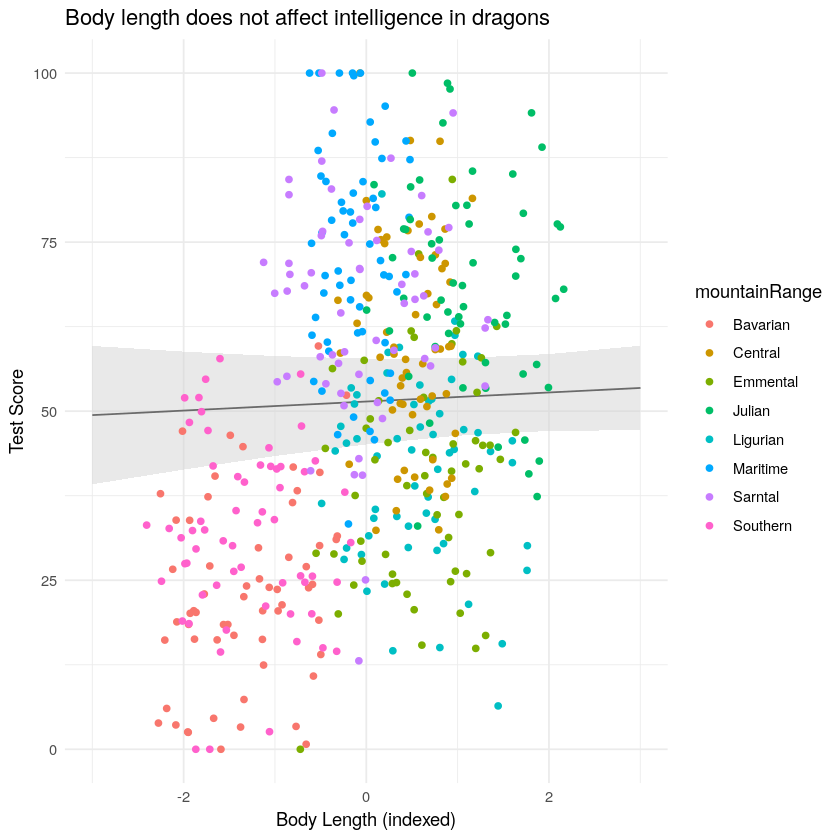

In [441]:
# Extract the prediction data frame
pred.mm <- ggpredict(mixed.slope, terms = c("bodyLength2"))  # this gives overall predictions for the model

# Plot the predictions 

(ggplot(pred.mm) + 
   geom_line(aes(x = x, y = predicted)) +          # slope
   geom_ribbon(aes(x = x, ymin = predicted - std.error, ymax = predicted + std.error), 
               fill = "lightgrey", alpha = 0.5)+  # error band
   geom_point(data = dragons,                      # adding the raw data (scaled values)
              aes(x = bodyLength2, y = testScore, colour = mountainRange)) +
   labs(x = "Body Length (indexed)", y = "Test Score", 
        title = "Body length does not affect intelligence in dragons") + 
   theme_minimal()
)

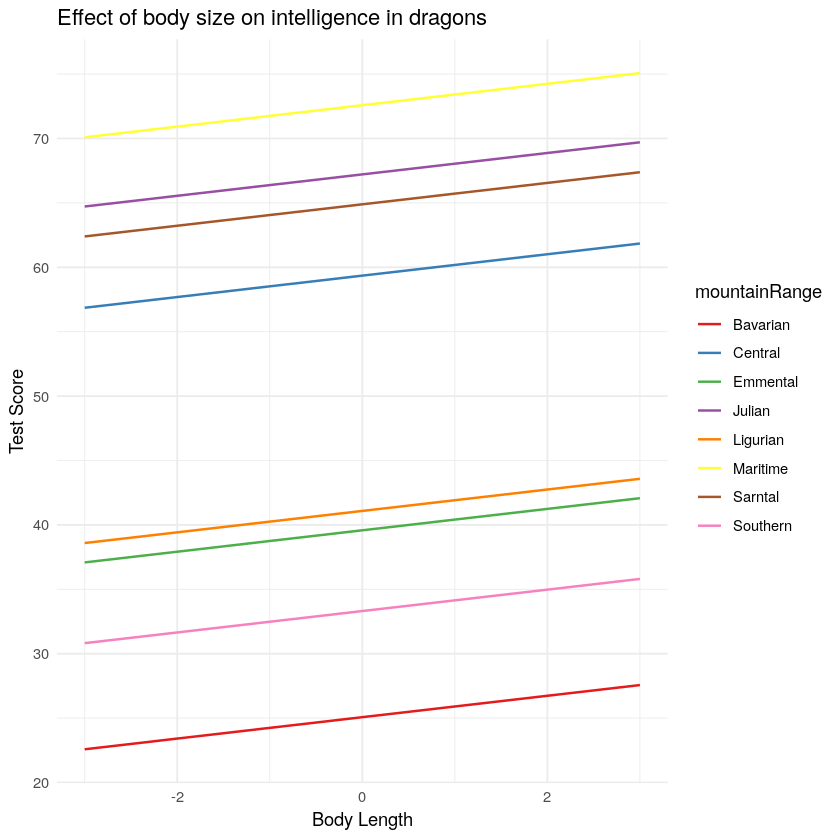

In [442]:
ggpredict(mixed.lmer2, terms = c("bodyLength2", "mountainRange"), type = "re") %>% 
   plot() +
   labs(x = "Body Length", y = "Test Score", title = "Effect of body size on intelligence in dragons") + 
   theme_minimal()

In [443]:
stargazer(mixed.slope, type = "text",
          digits = 3,
          star.cutoffs = c(0.05, 0.01, 0.001),
          digit.separator = "")


                         Dependent variable:     
                    -----------------------------
                              testScore          
-------------------------------------------------
bodyLength2                     0.669            
                               (1.873)           
                                                 
Constant                      51.427***          
                               (6.341)           
                                                 
-------------------------------------------------
Observations                     480             
Log Likelihood                -1984.202          
Akaike Inf. Crit.             3986.404           
Bayesian Inf. Crit.           4023.968           
Note:               *p<0.05; **p<0.01; ***p<0.001


## Example 2
This is from [link](http://faculty.smu.edu/kyler/training/AERA_overheads.pdf)

In [ ]:
data=read.table("example.txt",header=T)

In [ ]:
linear=lm(SCIENCE~URBAN,data)
summary(linear)
plot(SCIENCE~URBAN,data)
abline(linear)
plot(linear)
names(linear)
linear$coefficients

In [ ]:
fm.null=lmer(SCIENCE ~ 1+ (1|GROUP),data)
summary(fm.null)
coef(fm.null)

In [ ]:
# library("rgr")
bwplot(GROUP~resid(fm.null),data)

In [ ]:
with(data, tapply(SCIENCE, GROUP, mean))
coef(fm.null)

In [ ]:
fm1=lmer(SCIENCE~URBAN+(1|GROUP),data)
summary(fm1)
coef(fm1)

In [ ]:
anova(fm.null,fm1)
(mm_plot <- ggplot(data, aes(x = URBAN, y = SCIENCE, colour = GROUP)) +
      facet_wrap(~GROUP, nrow=2) +   # a panel for each mountain range
      geom_point(alpha = 0.5) +
      theme_classic() +
      geom_line(data = cbind(data, pred = predict(fm1)), aes(y = pred), size = 1) +  # adding predicted line from mixed model 
      theme(legend.position = "none",
            panel.spacing = unit(2, "lines"))  # adding space between panels
)

In [ ]:
fm2=lmer(SCIENCE~URBAN+(URBAN|GROUP),data)
summary(fm2)
coef(fm2)
anova(fm.null,fm2,fm1)
(mm_plot <- ggplot(data, aes(x = URBAN, y = SCIENCE, colour = GROUP)) +
      facet_wrap(~GROUP, nrow=2) +   # a panel for each mountain range
      geom_point(alpha = 0.5) +
      theme_classic() +
      geom_line(data = cbind(data, pred = predict(fm2)), aes(y = pred), size = 1) +  # adding predicted line from mixed model 
      theme(legend.position = "none",
            panel.spacing = unit(2, "lines"))  # adding space between panels
)


In [ ]:
qqnorm(resid(fm2))
# qqmath(resid(fm2))
qqline(resid(fm2))


In [ ]:
with(fm2, xyplot(resid(fm2) ~ fitted(fm2)))

## Example 3 "Mathematical Achievement"

This is used in the book Hierarchical linear models Applications and Data analysis methods and in the book Multivariate Generalized Linear Mixed Models Using R

### One way ANOVA

This is the model in page 23, but basically

$ Y_{ij} = \beta _{0j} + r_{ij}$

Where 

$\beta_{0j}= \gamma_{00}+\mu_{0j}$

$ Y_{ij} = \gamma_{00}+\mu_{0j}+r_{ij}$


which is the next in lmer

In [ ]:
MathAchieve$index=0
num=0
for (s in unique(MathAchieve$School)){
    MathAchieve[MathAchieve$School==s,"index"]=seq.int(nrow(MathAchieve[MathAchieve$School==s,]))
}


fm.oneWayAnova=lmer(MathAch~(1|School)+(1|index),MathAchieve)
summary(fm.oneWayAnova)


# mean(MathAchieve[MathAchieve$School==8367,"SES"])
# MathAchieve[MathAchieve$School==8367,]
# coef(fm.null)
# MathAchieve

# plot(MathAchieve$SES)

### Another approach

The next are from [link1](http://statweb.stanford.edu/~rag/stat209/LmeLab.pdf) which uses MathAchieve and has some interesting examples. Link1 is actuallky based on the next [link2](http://www.stat.rutgers.edu/home/yhung/Stat586/Mixed%20model/appendix-mixed-models.pdf)

## lmer example sleepstudy

In [306]:
fm1 <- lmer(Reaction ~ Days + (Days | Subject), sleepstudy)
summary(fm1)

Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ Days + (Days | Subject)
   Data: sleepstudy

REML criterion at convergence: 1743.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9536 -0.4634  0.0231  0.4633  5.1793 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 Subject  (Intercept) 611.90   24.737       
          Days         35.08    5.923   0.07
 Residual             654.94   25.592       
Number of obs: 180, groups:  Subject, 18

Fixed effects:
            Estimate Std. Error t value
(Intercept)  251.405      6.824  36.843
Days          10.467      1.546   6.771

Correlation of Fixed Effects:
     (Intr)
Days -0.138

In [307]:
sleepstudy


Reaction,Days,Subject
<dbl>,<dbl>,<fct>
249.5600,0,308
258.7047,1,308
250.8006,2,308
321.4398,3,308
356.8519,4,308
414.6901,5,308
382.2038,6,308
290.1486,7,308
430.5853,8,308
